<a href="https://colab.research.google.com/github/mbmora/tweepy/blob/master/SegundaResidencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving BASE DE DATOS TURISMO. Validaciones (1).xlsx to BASE DE DATOS TURISMO. Validaciones (1) (1).xlsx
['BASE DESCARGADA DE INTERNET', 'BASE CODIFICADA', 'Hoja1', 'CODIFICACIÓN', 'LUGARES']


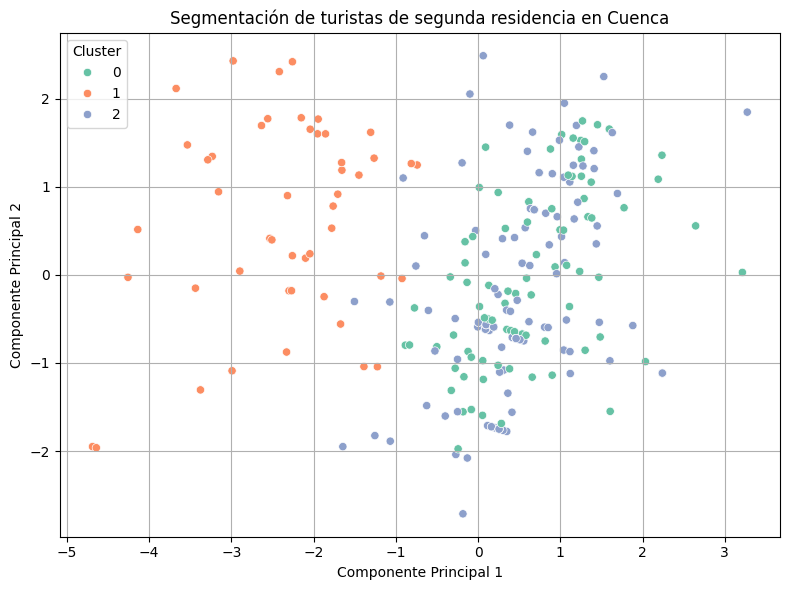

           63. Age  62. Sexo  64. Civil Status  65. ¿What is your occupation?  \
Cluster                                                                         
0        63.632184       2.0          2.241379                       9.816092   
1        48.875000       1.5          1.958333                       2.645833   
2        63.243902       1.0          2.235772                       9.666667   

         66. Level of education  67. Monthly income  \
Cluster                                               
0                      3.149425            2.931034   
1                      3.145833            2.479167   
2                      3.121951            2.756098   

         68. ¿Where does your income come from?      PCA1      PCA2  
Cluster                                                              
0                                      3.137931  0.622075 -0.059195  
1                                      1.645833 -2.356605  0.619316  
2                                     

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Si estás usando Google Colab, sube el archivo manualmente:
from google.colab import files
uploaded = files.upload()

# Luego cárgalo
df_excel = pd.ExcelFile("BASE DE DATOS TURISMO. Validaciones (1).xlsx")
print(df_excel.sheet_names)  # Para verificar las hojas disponibles

# Cargar la hoja "BASE CODIFICADA"
df = df_excel.parse("BASE CODIFICADA")

# Eliminar la primera fila vacía o no válida
df = df.iloc[1:].copy()


selected_columns = [
    '63. Age',
    '62. Sexo',
    '64. Civil Status',
    '65. ¿What is your occupation?',
    '66. Level of education',
    '67. Monthly income',
    '68. ¿Where does your income come from?'
]

df_selected = df[selected_columns].apply(pd.to_numeric, errors='coerce')
df_selected.dropna(inplace=True)  # Eliminar filas con datos faltantes


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


# Definir número de clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

# Agregar la etiqueta de clúster al DataFrame original
df_selected['Cluster'] = clusters


pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
df_selected['PCA1'] = pca_components[:, 0]
df_selected['PCA2'] = pca_components[:, 1]


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_selected, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Segmentación de turistas de segunda residencia en Cuenca")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


df_summary = df_selected.groupby('Cluster').mean()
print(df_summary)

